- Size: Long lowest size firms,and short highest size firms
- Value: Long highest value stocks,and short lowest value stocks
  - EP:earnings to price radio 相对于公司赚钱能力，公司股价是什么水平
  - Value stock 价值股 Growth stock 成长股

In [2]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [3]:
cross = pd.read_csv("D:/python data/ret_mon_python2023.csv")
from pandas.tseries.offsets import MonthEnd

cross['month'] = pd.to_datetime(cross['month'],format='%Y-%m-%d')+MonthEnd(1)
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd']=cross['Stkcd'].apply(lambda x:'{:0>6}'.format(x))#6位股票代码
cross['w']=1
cross=cross.dropna(subset=['ret'])
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w
1,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1
2,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1
3,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1
4,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1
5,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1
752024,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1
752025,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1
752026,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1


In [4]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['totalvalue'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='totalvalue')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-31,7.499850e+06,1.324290e+07,4.841034e+07,8.357778e+07,1.645389e+08,2.455000e+08,5.287392e+08,8.119784e+08,9.109892e+08
1991-02-28,1.168762e+07,1.787684e+07,6.941160e+07,1.426559e+08,2.168625e+08,4.029251e+08,6.804663e+08,8.582599e+08,1.065150e+09
1991-03-31,1.098601e+07,1.691778e+07,4.002500e+07,7.086472e+07,1.199623e+08,3.103026e+08,6.328671e+08,8.540667e+08,9.379800e+08
1991-04-30,1.106975e+07,1.805230e+07,3.729500e+07,6.259785e+07,1.070732e+08,2.760596e+08,5.889068e+08,8.629674e+08,9.611433e+08
1991-05-31,1.310760e+07,2.075000e+07,3.930000e+07,7.435439e+07,1.237500e+08,4.656752e+08,8.200000e+08,9.495000e+08,1.179490e+09
...,...,...,...,...,...,...,...,...,...
2023-08-31,2.409184e+09,2.989534e+09,3.635605e+09,4.424176e+09,5.520202e+09,7.084067e+09,9.755098e+09,1.501682e+10,2.876172e+10
2023-09-30,2.421632e+09,2.985093e+09,3.638369e+09,4.403628e+09,5.487673e+09,7.058126e+09,9.799861e+09,1.484667e+10,2.831428e+10
2023-10-31,2.409577e+09,2.957719e+09,3.627091e+09,4.384522e+09,5.401911e+09,6.984732e+09,9.608270e+09,1.451708e+10,2.725788e+10


In [5]:
portfolio = pd.merge(cross,fenweishu,left_on='month',right_on='month',how='left')
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,one,two,three,four,five,six,seven,eight,nine
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,1.310760e+07,2.075000e+07,3.930000e+07,7.435439e+07,1.237500e+08,4.656752e+08,8.200000e+08,9.495000e+08,1.179490e+09
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,1.568160e+07,2.530000e+07,4.680000e+07,6.750000e+07,8.803190e+07,5.041568e+08,8.460000e+08,9.808000e+08,1.424909e+09
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,1.853584e+07,3.524000e+07,4.962750e+07,7.375645e+07,2.909111e+08,6.515875e+08,7.824435e+08,9.234410e+08,1.385166e+09
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,3.987000e+07,4.686000e+07,5.697000e+07,1.202482e+08,2.114458e+08,5.175314e+08,7.128432e+08,1.038883e+09,1.315300e+09
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,4.695500e+07,5.084500e+07,5.776000e+07,1.127927e+08,2.007668e+08,4.029891e+08,6.602826e+08,1.001743e+09,1.268519e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,2.409184e+09,2.989534e+09,3.635605e+09,4.424176e+09,5.520202e+09,7.084067e+09,9.755098e+09,1.501682e+10,2.876172e+10
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,2.421632e+09,2.985093e+09,3.638369e+09,4.403628e+09,5.487673e+09,7.058126e+09,9.799861e+09,1.484667e+10,2.831428e+10
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,2.409577e+09,2.957719e+09,3.627091e+09,4.384522e+09,5.401911e+09,6.984732e+09,9.608270e+09,1.451708e+10,2.725788e+10
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,2.539108e+09,3.126053e+09,3.791893e+09,4.588888e+09,5.702116e+09,7.194539e+09,9.833215e+09,1.482454e+10,2.753897e+10


In [6]:
portfolio['sort'] = np.where(
    portfolio['totalvalue'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['totalvalue'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['totalvalue'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['totalvalue'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['totalvalue'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['totalvalue'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['totalvalue'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['totalvalue'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['totalvalue'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio = portfolio.dropna(subset=['floatingvalue','next_ret'])
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,one,two,three,four,five,six,seven,eight,nine,sort
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,1.310760e+07,2.075000e+07,3.930000e+07,7.435439e+07,1.237500e+08,4.656752e+08,8.200000e+08,9.495000e+08,1.179490e+09,Pmax
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,1.568160e+07,2.530000e+07,4.680000e+07,6.750000e+07,8.803190e+07,5.041568e+08,8.460000e+08,9.808000e+08,1.424909e+09,Pmax
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,1.853584e+07,3.524000e+07,4.962750e+07,7.375645e+07,2.909111e+08,6.515875e+08,7.824435e+08,9.234410e+08,1.385166e+09,Pmax
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,3.987000e+07,4.686000e+07,5.697000e+07,1.202482e+08,2.114458e+08,5.175314e+08,7.128432e+08,1.038883e+09,1.315300e+09,Pmax
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,4.695500e+07,5.084500e+07,5.776000e+07,1.127927e+08,2.007668e+08,4.029891e+08,6.602826e+08,1.001743e+09,1.268519e+09,Pmax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709877,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,2.422788e+09,3.085101e+09,3.741794e+09,4.598944e+09,5.784315e+09,7.495814e+09,1.049064e+10,1.606811e+10,3.076851e+10,P8
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,2.409184e+09,2.989534e+09,3.635605e+09,4.424176e+09,5.520202e+09,7.084067e+09,9.755098e+09,1.501682e+10,2.876172e+10,P8
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,2.421632e+09,2.985093e+09,3.638369e+09,4.403628e+09,5.487673e+09,7.058126e+09,9.799861e+09,1.484667e+10,2.831428e+10,P8
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,2.409577e+09,2.957719e+09,3.627091e+09,4.384522e+09,5.401911e+09,6.984732e+09,9.608270e+09,1.451708e+10,2.725788e+10,P8


In [7]:
portfolio_size=pd.DataFrame(portfolio.groupby(['month','sort']).apply(
    lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False))
portfolio_size

0
month      sort          
1991-01-31 P1    0.028134
           P2   -0.041567
           P4    0.081305
           P6    0.038284
           P8   -0.002070
...                   ...
2023-11-30 P6   -0.029353
           P7   -0.035430
           P8   -0.029991
           P9   -0.028759
           Pmax -0.017816

[3946 rows x 1 columns]

In [8]:
portfolio_size = portfolio_size.reset_index()
portfolio_size.columns = ['month', 'sort', 'p']
portfolio_size['month'] = portfolio_size['month'] + MonthEnd(1)
portfolio_size

,month,sort,p
0,1991-02-28,P1,0.028134
1,1991-02-28,P2,-0.041567
2,1991-02-28,P4,0.081305
3,1991-02-28,P6,0.038284
4,1991-02-28,P8,-0.002070
...,...,...,...
3941,2023-12-31,P6,-0.029353
3942,2023-12-31,P7,-0.035430
3943,2023-12-31,P8,-0.029991
3944,2023-12-31,P9,-0.028759


In [9]:
portfolio_size = portfolio_size.pivot_table(index='month',columns='sort', values='p')
portfolio_size['My_portfolio'] = portfolio_size['P1'] - portfolio_size['Pmax']
portfolio_size

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-02-28,0.028134,-0.041567,NaN,0.081305,NaN,0.038284,NaN,-0.002070,NaN,0.010496,0.017638
1991-03-31,0.070941,-0.069140,-0.059149,-0.070455,-0.133253,-0.044343,-0.133504,0.023904,-0.125264,-0.133293,0.204234
1991-04-30,0.087227,-0.000595,0.070484,-0.097744,-0.133193,-0.103582,-0.122736,0.120035,-0.077512,-0.123391,0.210618
1991-05-31,0.202117,0.080639,0.055289,-0.130814,-0.006657,-0.120582,-0.036993,-0.031989,0.238572,-0.129118,0.331235
1991-06-30,0.186315,0.213185,0.184748,0.177858,-0.460637,-0.309901,0.190006,-0.115097,0.201980,-0.119551,0.305866
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706


In [10]:
portfolio_size=portfolio_size['1995':'2023']
portfolio_size

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1995-01-31,-0.145162,-0.133811,-0.131991,-0.141603,-0.138500,-0.129420,-0.125187,-0.133302,-0.142752,-0.131525,-0.013637
1995-02-28,-0.014135,-0.016487,-0.026105,-0.013507,-0.027373,-0.031945,-0.013020,-0.020658,-0.028212,-0.030146,0.016012
1995-03-31,0.145888,0.124613,0.137706,0.151517,0.172736,0.151145,0.132809,0.102804,0.128072,0.160310,-0.014422
1995-04-30,-0.129085,-0.117482,-0.104661,-0.114248,-0.100667,-0.092057,-0.118221,-0.123341,-0.095764,-0.112655,-0.016430
1995-05-31,0.240024,0.178908,0.238830,0.196759,0.179584,0.196451,0.163534,0.179333,0.203274,0.156261,0.083763
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706


In [11]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size['2000':'2023']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        19:55:05   Log-Likelihood:                 297.37
No. Observations:                 288   AIC:                            -592.7
Df Residuals:                     287   BIC:                            -589.1
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0189      0.005      3.693      0.0

In [12]:
data = pd.read_csv("D:/python data/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [13]:
MYPORT=pd.merge(portfolio_size,Month_data,left_index=True,right_index=True,how='left')
MYPORT=MYPORT['1995':'2023']
MYPORT

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,Raw_return
month,,,,,,,,,,,,
1995-01-31,-0.145162,-0.133811,-0.131991,-0.141603,-0.138500,-0.129420,-0.125187,-0.133302,-0.142752,-0.131525,-0.013637,-0.131631
1995-02-28,-0.014135,-0.016487,-0.026105,-0.013507,-0.027373,-0.031945,-0.013020,-0.020658,-0.028212,-0.030146,0.016012,-0.023694
1995-03-31,0.145888,0.124613,0.137706,0.151517,0.172736,0.151145,0.132809,0.102804,0.128072,0.160310,-0.014422,0.177803
1995-04-30,-0.129085,-0.117482,-0.104661,-0.114248,-0.100667,-0.092057,-0.118221,-0.123341,-0.095764,-0.112655,-0.016430,-0.103552
1995-05-31,0.240024,0.178908,0.238830,0.196759,0.179584,0.196451,0.163534,0.179333,0.203274,0.156261,0.083763,0.207922
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319,-0.052009
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498,-0.003013
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706,-0.029483


## size是$\beta$还是$\alpha$

In [14]:
model_port = smf.ols('My_portfolio ~ Raw_return',data=MYPORT).fit(
     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08494
Date:                Mon, 16 Dec 2024   Prob (F-statistic):              0.771
Time:                        20:08:35   Log-Likelihood:                 363.13
No. Observations:                 348   AIC:                            -722.3
Df Residuals:                     346   BIC:                            -714.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0206      0.004      4.618      0.0

$$
R_{size,t}=0.0206(\alpha)^{***}+0.0254(\beta)*R_{m,t}
$$

$$
R_{small,t}-R_{big,t}=\alpha+(\beta_{small}-\beta_{big})*R_{m,t}
$$

## 投资策略的Sharp Ratio
$$
\frac{R_{t}}{sd(R_{t})}
$$

In [15]:
#年化
sharpe_ratio = MYPORT['My_portfolio'].mean()*12 / (MYPORT['My_portfolio'].std() * np.sqrt(12))
sharpe_ratio

np.float64(0.8421606208535234)

In [16]:
sharpe_ratio = MYPORT['Raw_return'].mean()*12 / (MYPORT['Raw_return'].std() * np.sqrt(12))
sharpe_ratio

np.float64(0.3297689226836333)

## 规模策略价格图

In [17]:
# 还原投资策略的价格
MYPORT['price_portfolio'] = (1 + MYPORT['My_portfolio']).cumprod()
MYPORT['price_p1'] = (1 + MYPORT['P1']).cumprod()
MYPORT['price_pmax'] = (1 + MYPORT['Pmax']).cumprod()
MYPORT['price_market'] = (1 + MYPORT['Raw_return']).cumprod()
MYPORT

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,Raw_return,price_portfolio,price_p1,price_pmax,price_market
month,,,,,,,,,,,,,,,,
1995-01-31,-0.145162,-0.133811,-0.131991,-0.141603,-0.138500,-0.129420,-0.125187,-0.133302,-0.142752,-0.131525,-0.013637,-0.131631,0.986363,0.854838,0.868475,0.868369
1995-02-28,-0.014135,-0.016487,-0.026105,-0.013507,-0.027373,-0.031945,-0.013020,-0.020658,-0.028212,-0.030146,0.016012,-0.023694,1.002156,0.842756,0.842294,0.847794
1995-03-31,0.145888,0.124613,0.137706,0.151517,0.172736,0.151145,0.132809,0.102804,0.128072,0.160310,-0.014422,0.177803,0.987703,0.965703,0.977322,0.998534
1995-04-30,-0.129085,-0.117482,-0.104661,-0.114248,-0.100667,-0.092057,-0.118221,-0.123341,-0.095764,-0.112655,-0.016430,-0.103552,0.971475,0.841046,0.867222,0.895133
1995-05-31,0.240024,0.178908,0.238830,0.196759,0.179584,0.196451,0.163534,0.179333,0.203274,0.156261,0.083763,0.207922,1.052849,1.042917,1.002735,1.081251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319,-0.052009,307.840019,1144.563999,2.484129,4.815596
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498,-0.003013,317.844299,1167.772598,2.453770,4.801086
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706,-0.029483,331.100158,1177.347059,2.371553,4.659537


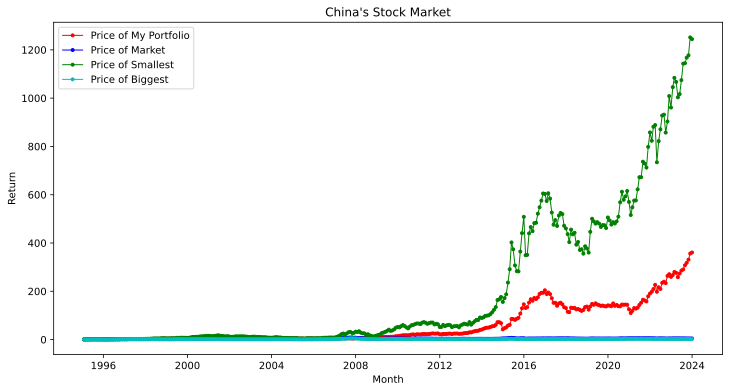

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPORT)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPORT) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Smallest', 
    linewidth=1, 
    data=MYPORT) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Biggest', 
    linewidth=1, 
    data=MYPORT) 
plt.legend() # 显示图例
fig = plt.gcf()
plt.show();

In [19]:
# 计算累积收益率
MYPORT['cumulative_return'] = (1 + MYPORT['My_portfolio']).cumprod()

# 计算滚动最大值
MYPORT['rolling_max'] = MYPORT['cumulative_return'].cummax()

# 计算回撤
MYPORT['drawdown'] = MYPORT['cumulative_return'] / MYPORT['rolling_max'] - 1
max_drawdown_end = MYPORT['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = MYPORT.loc[:max_drawdown_end, 'cumulative_return'].idxmax()

# 计算最大回撤
max_drawdown = MYPORT['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.7518251097331382
Maximum Drawdown Start Date: 2002-05-31 00:00:00
Maximum Drawdown End Date: 2006-12-31 00:00:00


In [20]:
MYPORT_new=MYPORT['2000':'2008'].copy()
MYPORT_new['price_portfolio'] = (1 + MYPORT_new['My_portfolio']).cumprod()
MYPORT_new['price_p1'] = (1 + MYPORT_new['P1']).cumprod()
MYPORT_new['price_pmax'] = (1 + MYPORT_new['Pmax']).cumprod()
MYPORT_new['price_market'] = (1 + MYPORT_new['Raw_return']).cumprod()
MYPORT_new

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,Raw_return,price_portfolio,price_p1,price_pmax,price_market,cumulative_return,rolling_max,drawdown
month,,,,,,,,,,,,,,,,,,,
2000-01-31,0.107675,0.118171,0.133868,0.105133,0.128630,0.150785,0.168638,0.173213,0.166317,0.119309,-0.011634,0.123242,0.988366,1.107675,1.119309,1.123242,4.673401,4.871883,-0.040740
2000-02-29,0.157791,0.162398,0.123828,0.138939,0.128407,0.118041,0.117392,0.094022,0.110745,0.114792,0.042998,0.116990,1.030864,1.282456,1.247797,1.254650,4.874350,4.874350,0.000000
2000-03-31,0.194708,0.213351,0.126901,0.147156,0.085313,0.115456,0.050258,0.050254,0.042406,-0.000724,0.195431,0.049948,1.232328,1.532160,1.246894,1.317318,5.826951,5.826951,0.000000
2000-04-30,0.006243,0.030857,0.016793,0.007459,0.020833,0.013064,-0.009961,0.013582,0.011345,0.024696,-0.018454,0.020053,1.209586,1.541725,1.277688,1.343734,5.719421,5.826951,-0.018454
2000-05-31,0.054643,0.061303,0.049279,0.033498,0.044101,0.032674,0.025142,0.036417,0.022744,0.010923,0.043721,0.031710,1.262471,1.625970,1.291643,1.386344,5.969479,5.969479,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-31,-0.211612,-0.227714,-0.229304,-0.233168,-0.224725,-0.241339,-0.245395,-0.242011,-0.231949,-0.126490,-0.085122,-0.136307,1.279680,2.488781,1.603653,1.754284,6.050851,10.206976,-0.407185
2008-09-30,-0.122316,-0.107537,-0.092546,-0.101829,-0.105507,-0.084760,-0.089750,-0.065620,-0.042731,-0.042012,-0.080304,-0.043210,1.176916,2.184362,1.536280,1.678482,5.564942,10.206976,-0.454790
2008-10-31,-0.227984,-0.232990,-0.254290,-0.271172,-0.249400,-0.268830,-0.275560,-0.268572,-0.279455,-0.249162,0.021178,-0.246314,1.201840,1.686362,1.153497,1.265049,5.682794,10.206976,-0.443244


# 不同样本

In [21]:
MYPORT_new=MYPORT['2000':'2008'].copy()
MYPORT_new['price_portfolio'] = (1 + MYPORT_new['My_portfolio']).cumprod()
MYPORT_new['price_p1'] = (1 + MYPORT_new['P1']).cumprod()
MYPORT_new['price_pmax'] = (1 + MYPORT_new['Pmax']).cumprod()
MYPORT_new['price_market'] = (1 + MYPORT_new['Raw_return']).cumprod()
MYPORT_new

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,Raw_return,price_portfolio,price_p1,price_pmax,price_market,cumulative_return,rolling_max,drawdown
month,,,,,,,,,,,,,,,,,,,
2000-01-31,0.107675,0.118171,0.133868,0.105133,0.128630,0.150785,0.168638,0.173213,0.166317,0.119309,-0.011634,0.123242,0.988366,1.107675,1.119309,1.123242,4.673401,4.871883,-0.040740
2000-02-29,0.157791,0.162398,0.123828,0.138939,0.128407,0.118041,0.117392,0.094022,0.110745,0.114792,0.042998,0.116990,1.030864,1.282456,1.247797,1.254650,4.874350,4.874350,0.000000
2000-03-31,0.194708,0.213351,0.126901,0.147156,0.085313,0.115456,0.050258,0.050254,0.042406,-0.000724,0.195431,0.049948,1.232328,1.532160,1.246894,1.317318,5.826951,5.826951,0.000000
2000-04-30,0.006243,0.030857,0.016793,0.007459,0.020833,0.013064,-0.009961,0.013582,0.011345,0.024696,-0.018454,0.020053,1.209586,1.541725,1.277688,1.343734,5.719421,5.826951,-0.018454
2000-05-31,0.054643,0.061303,0.049279,0.033498,0.044101,0.032674,0.025142,0.036417,0.022744,0.010923,0.043721,0.031710,1.262471,1.625970,1.291643,1.386344,5.969479,5.969479,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-31,-0.211612,-0.227714,-0.229304,-0.233168,-0.224725,-0.241339,-0.245395,-0.242011,-0.231949,-0.126490,-0.085122,-0.136307,1.279680,2.488781,1.603653,1.754284,6.050851,10.206976,-0.407185
2008-09-30,-0.122316,-0.107537,-0.092546,-0.101829,-0.105507,-0.084760,-0.089750,-0.065620,-0.042731,-0.042012,-0.080304,-0.043210,1.176916,2.184362,1.536280,1.678482,5.564942,10.206976,-0.454790
2008-10-31,-0.227984,-0.232990,-0.254290,-0.271172,-0.249400,-0.268830,-0.275560,-0.268572,-0.279455,-0.249162,0.021178,-0.246314,1.201840,1.686362,1.153497,1.265049,5.682794,10.206976,-0.443244


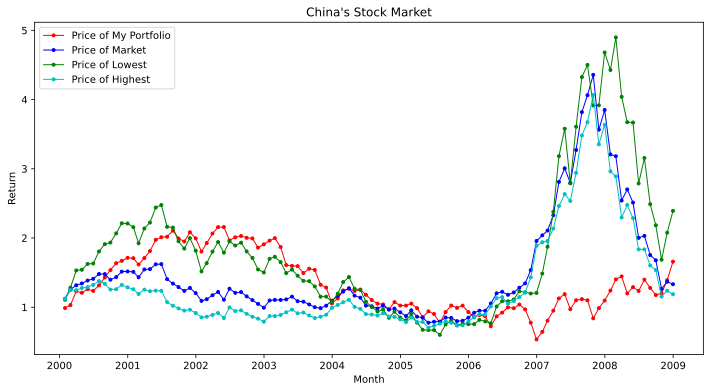

In [22]:
fig = plt.figure(figsize=(12, 6))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPORT_new)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPORT_new) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPORT_new) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPORT_new) 
plt.legend() # 显示图例
fig = plt.gcf()
plt.show();

# 1月效应

In [23]:
portfolio_size_Jan = portfolio_size.copy()
portfolio_size_Jan = portfolio_size_Jan.reset_index()
portfolio_size_Jan['yue'] = portfolio_size_Jan['month'].dt.month
portfolio_size_Jan = portfolio_size_Jan[portfolio_size_Jan['yue'] != 1]
portfolio_size_Jan.set_index(['month'],inplace=True)
portfolio_size_Jan

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,yue
month,,,,,,,,,,,,
1995-02-28,-0.014135,-0.016487,-0.026105,-0.013507,-0.027373,-0.031945,-0.013020,-0.020658,-0.028212,-0.030146,0.016012,2
1995-03-31,0.145888,0.124613,0.137706,0.151517,0.172736,0.151145,0.132809,0.102804,0.128072,0.160310,-0.014422,3
1995-04-30,-0.129085,-0.117482,-0.104661,-0.114248,-0.100667,-0.092057,-0.118221,-0.123341,-0.095764,-0.112655,-0.016430,4
1995-05-31,0.240024,0.178908,0.238830,0.196759,0.179584,0.196451,0.163534,0.179333,0.203274,0.156261,0.083763,5
1995-06-30,-0.024436,-0.073405,-0.079738,-0.106261,-0.089520,-0.109416,-0.104477,-0.104306,-0.123102,-0.100064,0.075628,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319,8
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498,9
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706,10


In [24]:
model_size_Jan = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size_Jan).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_size_Jan.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        20:12:35   Log-Likelihood:                 330.88
No. Observations:                 319   AIC:                            -659.8
Df Residuals:                     318   BIC:                            -656.0
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0220      0.005      4.660      0.0

In [25]:
portfolio_size_Feb = portfolio_size.copy()
portfolio_size_Feb = portfolio_size_Feb.reset_index()
portfolio_size_Feb['yue'] = portfolio_size_Feb['month'].dt.month
portfolio_size_Feb = portfolio_size_Feb[portfolio_size_Feb['yue'] != 2]
portfolio_size_Feb.set_index(['month'],inplace=True)
portfolio_size_Feb

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,yue
month,,,,,,,,,,,,
1995-01-31,-0.145162,-0.133811,-0.131991,-0.141603,-0.138500,-0.129420,-0.125187,-0.133302,-0.142752,-0.131525,-0.013637,1
1995-03-31,0.145888,0.124613,0.137706,0.151517,0.172736,0.151145,0.132809,0.102804,0.128072,0.160310,-0.014422,3
1995-04-30,-0.129085,-0.117482,-0.104661,-0.114248,-0.100667,-0.092057,-0.118221,-0.123341,-0.095764,-0.112655,-0.016430,4
1995-05-31,0.240024,0.178908,0.238830,0.196759,0.179584,0.196451,0.163534,0.179333,0.203274,0.156261,0.083763,5
1995-06-30,-0.024436,-0.073405,-0.079738,-0.106261,-0.089520,-0.109416,-0.104477,-0.104306,-0.123102,-0.100064,0.075628,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001526,-0.007487,-0.027998,-0.040304,-0.043932,-0.057348,-0.060162,-0.066902,-0.060407,-0.057794,0.059319,8
2023-09-30,0.020277,0.014331,-0.000218,0.001945,-0.009448,-0.003383,0.004828,-0.007206,-0.008534,-0.012221,0.032498,9
2023-10-31,0.008199,0.006227,-0.003861,-0.001851,-0.004907,-0.010312,-0.019380,-0.028806,-0.025160,-0.033507,0.041706,10


In [26]:
model_size_Feb = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size_Feb).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_size_Feb.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        20:13:01   Log-Likelihood:                 327.50
No. Observations:                 319   AIC:                            -653.0
Df Residuals:                     318   BIC:                            -649.2
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0175      0.005      3.581      0.0

# Value 策略

In [27]:
EP = pd.read_csv("D:/python data/EP2023.csv")
EP['month'] = pd.to_datetime(EP['month'], format='%Y-%m-%d') + MonthEnd(1)
EP = EP[['Stkcd','month','ep','ep_recent']]
EP['Stkcd'] = EP['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
EP

,Stkcd,month,ep,ep_recent
0,000001,1991-04-30,NaN,NaN
1,000001,1991-05-31,NaN,NaN
2,000001,1991-06-30,NaN,NaN
3,000001,1991-07-31,NaN,NaN
4,000001,1991-08-31,NaN,NaN
...,...,...,...,...
752023,605599,2023-08-31,0.054878,0.036802
752024,605599,2023-09-30,0.051179,0.034322
752025,605599,2023-10-31,0.058164,0.050524
752026,605599,2023-11-30,0.059760,0.051910


In [28]:
cross = pd.merge(cross,EP[['Stkcd','month','ep','ep_recent']],on=['Stkcd','month'],how='left')
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,NaN,NaN
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,NaN,NaN
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,NaN,NaN
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,NaN,NaN
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910


In [29]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['ep'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='ep')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-31,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296
1991-02-28,0.002958,0.003930,0.004309,0.004688,0.004966,0.005244,0.013876,0.022509,0.030363
1991-03-31,0.004372,0.004548,0.005040,0.005532,0.007924,0.010316,0.017923,0.025530,0.033141
1991-04-30,0.004420,0.004804,0.004970,0.005136,0.008243,0.011350,0.019414,0.027477,0.033992
1991-05-31,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740
...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.049601,-0.011916,0.002636,0.011005,0.018754,0.026098,0.034812,0.047238,0.071377
2023-09-30,-0.048772,-0.012110,0.002575,0.010991,0.018855,0.026206,0.034760,0.047755,0.071173
2023-10-31,-0.045980,-0.012401,0.001387,0.010373,0.018743,0.026326,0.035554,0.048309,0.071581


In [30]:
portfolio = pd.merge(cross,fenweishu,on='month')
portfolio['sort'] = np.where(
    portfolio['ep'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['ep'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['ep'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['ep'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['ep'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['ep'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['ep'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['ep'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['ep'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio = portfolio.dropna(subset=['floatingvalue','next_ret','ep'])
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,one,two,three,four,five,six,seven,eight,nine,sort
34,000001,1994-03-31,15.05,36,23.0,2.184334e+09,4.054739e+09,21.504577,22.123152,-0.170799,0.008719,-0.179518,0.053739,1,0.067405,0.067405,0.001488,0.002004,0.007389,0.013628,0.015989,0.021007,0.026544,0.042954,0.064559,Pmax
35,000001,1994-04-30,15.99,37,21.0,2.320765e+09,4.307992e+09,21.565163,22.183738,0.062458,0.008719,0.053739,-0.095648,1,0.063443,0.063443,0.002280,0.013236,0.019516,0.027554,0.041036,0.052489,0.062144,0.078678,0.084647,P8
36,000001,1994-05-31,14.60,38,21.0,2.119022e+09,3.933501e+09,21.474221,22.092796,-0.086929,0.008719,-0.095648,-0.088171,1,0.069483,0.069483,0.002379,0.015358,0.024298,0.037559,0.051864,0.059018,0.069656,0.076781,0.089289,P7
37,000001,1994-06-30,13.44,39,22.0,2.407403e+09,3.620977e+09,21.601814,22.010010,-0.079452,0.008719,-0.088171,-0.056046,1,0.075480,0.075480,0.002832,0.018418,0.027670,0.049931,0.061135,0.074077,0.086381,0.090049,0.114688,P7
38,000001,1994-07-31,8.00,40,18.0,2.292765e+09,3.448549e+09,21.553024,21.961219,-0.047327,0.008719,-0.056046,0.553781,1,0.079254,0.079254,0.004204,0.027413,0.035091,0.061044,0.075252,0.087968,0.101297,0.123165,0.142412,P6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709877,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,0.041298,0.019832,-0.046221,-0.010509,0.003185,0.011029,0.018120,0.025115,0.033761,0.044528,0.069779,P8
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,-0.049601,-0.011916,0.002636,0.011005,0.018754,0.026098,0.034812,0.047238,0.071377,P9
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,-0.048772,-0.012110,0.002575,0.010991,0.018855,0.026206,0.034760,0.047755,0.071173,P9
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,-0.045980,-0.012401,0.001387,0.010373,0.018743,0.026326,0.035554,0.048309,0.071581,P9


In [31]:
portfolio_value =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['floatingvalue']),include_groups=False))
portfolio_value = portfolio_value.reset_index()
portfolio_value.columns = ['month', 'sort', 'p']
portfolio_value['month'] = portfolio_value['month'] + MonthEnd(1)
portfolio_value

,month,sort,p
0,1991-02-28,P1,0.038284
1,1991-02-28,P3,0.081305
2,1991-02-28,P5,-0.002070
3,1991-02-28,P8,0.010496
4,1991-02-28,Pmax,-0.041567
...,...,...,...
3892,2023-12-31,P6,-0.027724
3893,2023-12-31,P7,-0.027612
3894,2023-12-31,P8,-0.019440
3895,2023-12-31,P9,-0.025161


In [32]:
portfolio_value = portfolio_value.pivot_table(index='month',
                                                    columns='sort',
                                                    values='p')
portfolio_value['My_portfolio'] = portfolio_value['Pmax'] - portfolio_value['P1']
portfolio_value

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-02-28,0.038284,NaN,0.081305,NaN,-0.002070,NaN,NaN,0.010496,NaN,-0.041567,-0.079851
1991-03-31,-0.044343,-0.070455,NaN,0.023904,NaN,-0.059149,NaN,-0.125264,NaN,-0.069140,-0.024797
1991-04-30,-0.133193,0.120035,NaN,0.070484,NaN,-0.097744,NaN,-0.077512,NaN,-0.000595,0.132598
1991-05-31,0.238572,-0.006657,NaN,0.055289,NaN,-0.130814,NaN,-0.031989,NaN,0.080639,-0.157933
1991-06-30,0.201980,0.177858,NaN,0.213185,NaN,0.184748,NaN,0.190006,NaN,0.190283,-0.011697
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.070485,-0.066837,-0.063734,-0.049295,-0.068867,-0.065806,-0.046944,-0.046131,-0.065664,-0.055323,0.015163
2023-09-30,0.004433,-0.009190,-0.018893,-0.016885,-0.005619,-0.013207,-0.021819,-0.036230,-0.012071,0.017587,0.013154
2023-10-31,0.028042,0.001178,-0.014708,0.003380,-0.017277,-0.035377,-0.027587,-0.024180,-0.032936,-0.044402,-0.072444


In [33]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_value['2000':'2023']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        20:17:25   Log-Likelihood:                 394.35
No. Observations:                 288   AIC:                            -786.7
Df Residuals:                     287   BIC:                            -783.0
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.003      1.439      0.1